In [5]:
# Jupyter notebook setup

import re
import math
import json
import datetime as dt
from pprint import pprint

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# === jupyter notebook config === 
# Show all output values in cells
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# === numpy & pandas config ===
np.set_printoptions(linewidth=240)
np.set_printoptions(threshold=np.inf)

pd.set_option('max_colwidth', 100)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.float_format', '{:,.2f}'.format)

# === graphs config ===
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 17, 8
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20

plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.weight'] = 'normal'

plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.style.use('bmh')
plt.style.use('fivethirtyeight')

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

In [6]:
import os

li = []

for root, directories, filenames in os.walk('./quotes'):
    for filename in filenames:
        df = pd.read_csv(os.path.join(root,filename), index_col=None, header=0)
        li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

In [16]:
df.shape
df.head()

(31232, 37)

,ACCINT,ADMITTEDQUOTE,ADMITTEDVALUE,BEICLOSE,BOARDID,BUYBACKDATE,CLOSE,COUPONPERCENT,COUPONVALUE,CURRENCYID,DURATION,FACEUNIT,FACEVALUE,HIGH,IRICPICLOSE,LASTTRADEDATE,LEGALCLOSEPRICE,LOW,MARKETPRICE2,MARKETPRICE3,MARKETPRICE3TRADESVALUE,MATDATE,MP2VALTRD,NUMTRADES,OFFERDATE,OPEN,SECID,SHORTNAME,TRADEDATE,VALUE,VOLUME,WAPRICE,WAVAL,YIELDATWAP,YIELDCLOSE,YIELDLASTCOUPON,YIELDTOOFFER
0,nan,139.00,0.00,nan,TQBR,NaN,139.00,nan,nan,NaN,nan,NaN,nan,139.00,nan,NaN,139.00,137.50,nan,139.00,"513,690.00",NaN,0.00,10.00,NaN,139.00,ABRD,АбрауДюрсо,2019-03-04,"42,995.00",310.00,138.50,nan,nan,nan,nan,nan
1,nan,6.32,0.00,nan,TQDE,NaN,6.32,nan,nan,NaN,nan,NaN,nan,6.34,nan,NaN,6.32,6.32,nan,6.54,"503,400.00",NaN,0.00,2.00,NaN,6.34,ACKO,АСКО ао,2019-03-04,"18,980.00","3,000.00",6.34,nan,nan,nan,nan,nan
2,nan,nan,0.00,nan,SMAL,NaN,10.05,nan,nan,NaN,nan,NaN,nan,10.08,nan,NaN,nan,10.05,nan,nan,0.00,NaN,0.00,3.00,NaN,10.08,AFKS,Система ао,2019-03-04,110.71,11.00,9.91,nan,nan,nan,nan,nan
3,nan,9.90,"101,711,296.70",nan,TQBR,NaN,9.90,nan,nan,NaN,nan,NaN,nan,9.95,nan,NaN,9.90,9.85,9.91,9.91,"101,711,296.70",NaN,"101,711,296.70","3,600.00",NaN,9.85,AFKS,Система ао,2019-03-04,"101,711,296.70","10,266,300.00",9.91,nan,nan,nan,nan,nan
4,nan,nan,0.00,nan,SMAL,NaN,97.64,nan,nan,NaN,nan,NaN,nan,98.32,nan,NaN,nan,94.04,nan,nan,0.00,NaN,0.00,7.00,NaN,94.04,AFLT,Аэрофлот,2019-03-04,"1,921.18",20.00,98.08,nan,nan,nan,nan,nan


In [18]:
yndx = df[(df.BOARDID == 'TQBR') & (df.SECID == 'YNDX')].sort_values(by='TRADEDATE')
yndx.dropna(axis=1, how='all')[['OPEN', 'CLOSE', 'VOLUME', 'TRADEDATE']]

,OPEN,CLOSE,VOLUME,TRADEDATE
21738,"1,918.50","1,859.50","148,487.00",2019-01-03
22229,"1,861.50","1,916.00","187,797.00",2019-01-04
28234,"1,933.00","1,926.50","114,452.00",2019-01-08
26758,"1,936.50","1,960.00","133,630.00",2019-01-09
25763,"1,970.50","1,985.00","142,546.00",2019-01-10
23222,"1,983.00","1,983.00","101,638.00",2019-01-11
30225,"1,985.00","1,992.50","107,716.00",2019-01-14
29725,"1,993.50","1,999.50","190,886.00",2019-01-15
24254,"1,997.50","1,980.00","179,500.00",2019-01-16
25274,"1,979.50","1,993.50","154,687.00",2019-01-17


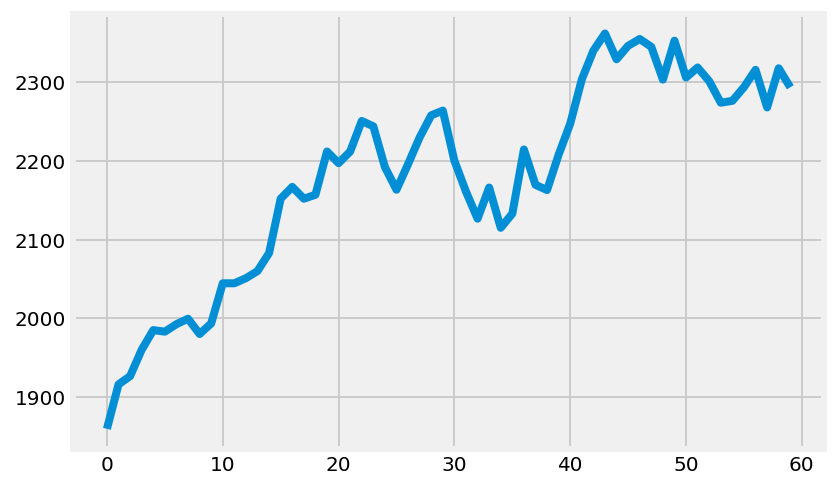

In [24]:
plt.plot(list(yndx.CLOSE))